In [307]:

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [308]:
#read dataset
data = pd.read_csv("/content/drive/MyDrive/CIND 820 Capstone Project/merged_completedata.csv")

In [309]:
#checking dimensions of data
data.head()

,RecordID,X,Y,FID,BusinessID,Name,Address,StreetNo,StreetName,BldgNo,UnitNo,PostalCode,Location,Ward,NAICSCode,NAICSCat,NAICSDescr,Phone,Fax,TollFree,EMail,WebAddress,EmplRange,CENT_X,CENT_Y,Year,Age,isnew,Closed
0,1,-79.689829,43.644181,1,1055,Golf Trends Inc.,300 Ambassador Dr,300,Ambassador Dr,No,No,L5T,Gateway EA (East),5,41,Wholesale Trade,Amusement and Sporting Goods Wholesaler-Distri...,Yes,Yes,Yes,Yes,Yes,3,605668.2538,4.833187e+06,2016,1,No,No
1,2,-79.689419,43.644988,2,1057,Apex Graphics Inc.,320 Ambassador Dr,320,Ambassador Dr,No,No,L5T,Gateway EA (East),5,32,Manufacturing,Support Activities for Printing,Yes,Yes,No,Yes,Yes,4,605699.9370,4.833277e+06,2016,1,No,No
2,3,-79.689419,43.644988,3,1058,"Sands, John & Associates Limited",320 Ambassador Dr,320,Ambassador Dr,No,No,L5T,Gateway EA (East),5,32,Manufacturing,Support Activities for Printing,Yes,Yes,No,No,No,5,605699.9370,4.833277e+06,2016,1,No,No
3,4,-79.689419,43.644988,4,1060,Printmedia-Tackaberry Times,320 Ambassador Dr,320,Ambassador Dr,No,No,L5T,Gateway EA (East),5,32,Manufacturing,Other Printing,Yes,Yes,No,Yes,Yes,1,605699.9370,4.833277e+06,2016,1,No,No
4,5,-79.690664,43.645493,5,1061,S W R Industries Ltd.,321 Ambassador Dr,321,Ambassador Dr,No,No,L5T,Gateway EA (East),5,41,Wholesale Trade,"Industrial Machinery, Equipment and Supplies W...",Yes,Yes,No,Yes,Yes,2,605598.6442,4.833332e+06,2016,1,No,No


In [310]:
#decribe categorical data
data.describe(include='O')

,Name,Address,StreetName,BldgNo,UnitNo,PostalCode,Location,NAICSCat,NAICSDescr,Phone,Fax,TollFree,EMail,WebAddress,isnew,Closed
count,78032,78032,78032,78032,78032,78032,78032,78032,78032,78032,78032,78032,78032,78032,78032,78032
unique,22710,6618,669,2,2,37,56,19,1039,2,2,2,2,2,2,2
top,Subway,100 City Centre Dr,Dundas St E,No,Yes,L4W,Northeast EA (West),Retail Trade,Limited-service eating places,Yes,Yes,No,Yes,Yes,No,No
freq,212,953,3202,73798,53665,12410,21104,11071,3647,77399,50803,66596,47406,56765,71148,71617


In [311]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78032 entries, 0 to 78031
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RecordID    78032 non-null  int64  
 1   X           78032 non-null  float64
 2   Y           78032 non-null  float64
 3   FID         78032 non-null  int64  
 4   BusinessID  78032 non-null  int64  
 5   Name        78032 non-null  object 
 6   Address     78032 non-null  object 
 7   StreetNo    78032 non-null  int64  
 8   StreetName  78032 non-null  object 
 9   BldgNo      78032 non-null  object 
 10  UnitNo      78032 non-null  object 
 11  PostalCode  78032 non-null  object 
 12  Location    78032 non-null  object 
 13  Ward        78032 non-null  int64  
 14  NAICSCode   78032 non-null  int64  
 15  NAICSCat    78032 non-null  object 
 16  NAICSDescr  78032 non-null  object 
 17  Phone       78032 non-null  object 
 18  Fax         78032 non-null  object 
 19  TollFree    78032 non-nul

In [312]:
#NAICSCode back to object
data['NAICSCode'] = data['NAICSCode'].astype(str)

In [313]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78032 entries, 0 to 78031
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RecordID    78032 non-null  int64  
 1   X           78032 non-null  float64
 2   Y           78032 non-null  float64
 3   FID         78032 non-null  int64  
 4   BusinessID  78032 non-null  int64  
 5   Name        78032 non-null  object 
 6   Address     78032 non-null  object 
 7   StreetNo    78032 non-null  int64  
 8   StreetName  78032 non-null  object 
 9   BldgNo      78032 non-null  object 
 10  UnitNo      78032 non-null  object 
 11  PostalCode  78032 non-null  object 
 12  Location    78032 non-null  object 
 13  Ward        78032 non-null  int64  
 14  NAICSCode   78032 non-null  object 
 15  NAICSCat    78032 non-null  object 
 16  NAICSDescr  78032 non-null  object 
 17  Phone       78032 non-null  object 
 18  Fax         78032 non-null  object 
 19  TollFree    78032 non-nul

<Axes: xlabel='Year'>

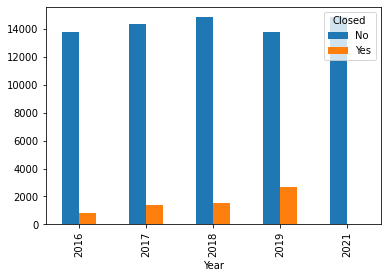

In [314]:
df_gb_openclosed = data.groupby(['Year', 'Closed']).size().unstack(level=1)
df_gb_openclosed.plot(kind = 'bar')

<Axes: xlabel='Year'>

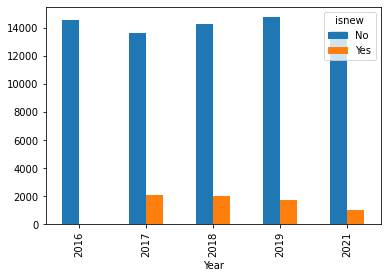

In [315]:
df_gb_openclosed = data.groupby(['Year', 'isnew']).size().unstack(level=1)
df_gb_openclosed.plot(kind = 'bar')

In [316]:
data.head()

,RecordID,X,Y,FID,BusinessID,Name,Address,StreetNo,StreetName,BldgNo,UnitNo,PostalCode,Location,Ward,NAICSCode,NAICSCat,NAICSDescr,Phone,Fax,TollFree,EMail,WebAddress,EmplRange,CENT_X,CENT_Y,Year,Age,isnew,Closed
0,1,-79.689829,43.644181,1,1055,Golf Trends Inc.,300 Ambassador Dr,300,Ambassador Dr,No,No,L5T,Gateway EA (East),5,41,Wholesale Trade,Amusement and Sporting Goods Wholesaler-Distri...,Yes,Yes,Yes,Yes,Yes,3,605668.2538,4.833187e+06,2016,1,No,No
1,2,-79.689419,43.644988,2,1057,Apex Graphics Inc.,320 Ambassador Dr,320,Ambassador Dr,No,No,L5T,Gateway EA (East),5,32,Manufacturing,Support Activities for Printing,Yes,Yes,No,Yes,Yes,4,605699.9370,4.833277e+06,2016,1,No,No
2,3,-79.689419,43.644988,3,1058,"Sands, John & Associates Limited",320 Ambassador Dr,320,Ambassador Dr,No,No,L5T,Gateway EA (East),5,32,Manufacturing,Support Activities for Printing,Yes,Yes,No,No,No,5,605699.9370,4.833277e+06,2016,1,No,No
3,4,-79.689419,43.644988,4,1060,Printmedia-Tackaberry Times,320 Ambassador Dr,320,Ambassador Dr,No,No,L5T,Gateway EA (East),5,32,Manufacturing,Other Printing,Yes,Yes,No,Yes,Yes,1,605699.9370,4.833277e+06,2016,1,No,No
4,5,-79.690664,43.645493,5,1061,S W R Industries Ltd.,321 Ambassador Dr,321,Ambassador Dr,No,No,L5T,Gateway EA (East),5,41,Wholesale Trade,"Industrial Machinery, Equipment and Supplies W...",Yes,Yes,No,Yes,Yes,2,605598.6442,4.833332e+06,2016,1,No,No


In [317]:
#decribe categorical data
data.describe(include='O')

,Name,Address,StreetName,BldgNo,UnitNo,PostalCode,Location,NAICSCode,NAICSCat,NAICSDescr,Phone,Fax,TollFree,EMail,WebAddress,isnew,Closed
count,78032,78032,78032,78032,78032,78032,78032,78032,78032,78032,78032,78032,78032,78032,78032,78032,78032
unique,22710,6618,669,2,2,37,56,24,19,1039,2,2,2,2,2,2,2
top,Subway,100 City Centre Dr,Dundas St E,No,Yes,L4W,Northeast EA (West),81,Retail Trade,Limited-service eating places,Yes,Yes,No,Yes,Yes,No,No
freq,212,953,3202,73798,53665,12410,21104,9052,11071,3647,77399,50803,66596,47406,56765,71148,71617


In [318]:
#drop columns that have unique values and categorical
data.drop(['FID','BusinessID','RecordID', 'Name','StreetNo','Address', 'NAICSCat', 'StreetName','Location','Phone','Fax','NAICSDescr','EMail','PostalCode','BldgNo','UnitNo','TollFree','WebAddress',"isnew", 'NAICSCode'], axis=1, inplace=True)

In [319]:
data = data[data['Year'] == 2019] 



In [320]:
data.head()

,X,Y,Ward,EmplRange,CENT_X,CENT_Y,Year,Age,Closed
46689,-79.665386,43.684736,5,1,607567.2334,4.837723e+06,2019,4,No
46690,-79.642760,43.593515,4,2,609556.5032,4.827621e+06,2019,2,No
46691,-79.667311,43.682752,5,3,607415.6044,4.837500e+06,2019,4,No
46692,-79.629235,43.698932,4,2,610454.8654,4.839347e+06,2019,1,No
46693,-79.629235,43.698932,4,4,610454.8654,4.839347e+06,2019,1,No


In [59]:
#data = data[data['Closed'] == 0] 
#use this for when taking 2021 and is new!!!

In [ ]:
#data.head()

In [321]:
df2 = data.mean(axis=0)
print(df2)

X           -7.965769e+01
Y            4.360136e+01
Ward         5.372927e+00
EmplRange    2.183981e+00
CENT_X       6.088039e+05
CENT_Y       4.828662e+06
Year         2.019000e+03
Age          3.364451e+00
dtype: float64


In [322]:
correlated_features= set()
correlation_matrix = data.drop('Closed', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    if abs(correlation_matrix.iloc[i,j]) > 0.8:
      colname = correlation_matrix.columns[i]
      correlated_features.add(colname)


In [323]:
correlated_features


{'CENT_X', 'CENT_Y'}

In [324]:
data.drop(['CENT_X', 'CENT_Y'], axis=1, inplace=True)
#use for closed analysys

In [325]:
#checking dimensions of data
data.head()

,X,Y,Ward,EmplRange,Year,Age,Closed
46689,-79.665386,43.684736,5,1,2019,4,No
46690,-79.642760,43.593515,4,2,2019,2,No
46691,-79.667311,43.682752,5,3,2019,4,No
46692,-79.629235,43.698932,4,2,2019,1,No
46693,-79.629235,43.698932,4,4,2019,1,No


In [326]:
data.dtypes

X            float64
Y            float64
Ward           int64
EmplRange      int64
Year           int64
Age            int64
Closed        object
dtype: object

In [327]:
X = data.drop('Closed', axis=1)
target = data['Closed']

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv_data = rfecv.fit(X, target)
#Recursive feature elimination
#Takes around 2-3 minutes to run. Not as effecient for feature selection.

In [328]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 4


In [329]:
print(np.where(rfecv.support_ == False)[0])

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[4 5]


In [330]:
rfecv.estimator_.feature_importances_

array([0.40950297, 0.42049184, 0.05850092, 0.11150427])

In [331]:
ranking_features = rfecv.ranking_
print (ranking_features)


[1 1 1 1 3 2]


In [332]:
ranking_scores = rfecv.cv_results_
print(ranking_scores)

{'mean_test_score': array([0.7111346 , 0.71924598, 0.73729562, 0.73808445, 0.73420456,
       0.73341738]), 'std_test_score': array([0.18339097, 0.18618487, 0.1262046 , 0.1199649 , 0.14775102,
       0.14623285]), 'split0_test_score': array([0.80811138, 0.82566586, 0.81053269, 0.80992736, 0.81416465,
       0.81355932]), 'split1_test_score': array([0.78692494, 0.80145278, 0.80932203, 0.81113801, 0.81355932,
       0.80932203]), 'split2_test_score': array([0.75060533, 0.75544794, 0.74455206, 0.72336562, 0.74818402,
       0.74576271]), 'split3_test_score': array([0.76150121, 0.76997579, 0.76089588, 0.75484262, 0.75847458,
       0.76815981]), 'split4_test_score': array([0.73365617, 0.74939467, 0.77360775, 0.76876513, 0.77058111,
       0.76937046]), 'split5_test_score': array([0.76392252, 0.77542373, 0.78631961, 0.79116223, 0.79358354,
       0.79116223]), 'split6_test_score': array([0.77905569, 0.78389831, 0.78813559, 0.78631961, 0.78934625,
       0.78692494]), 'split7_test_score': ar

Text(0.5, 0, 'Importance')

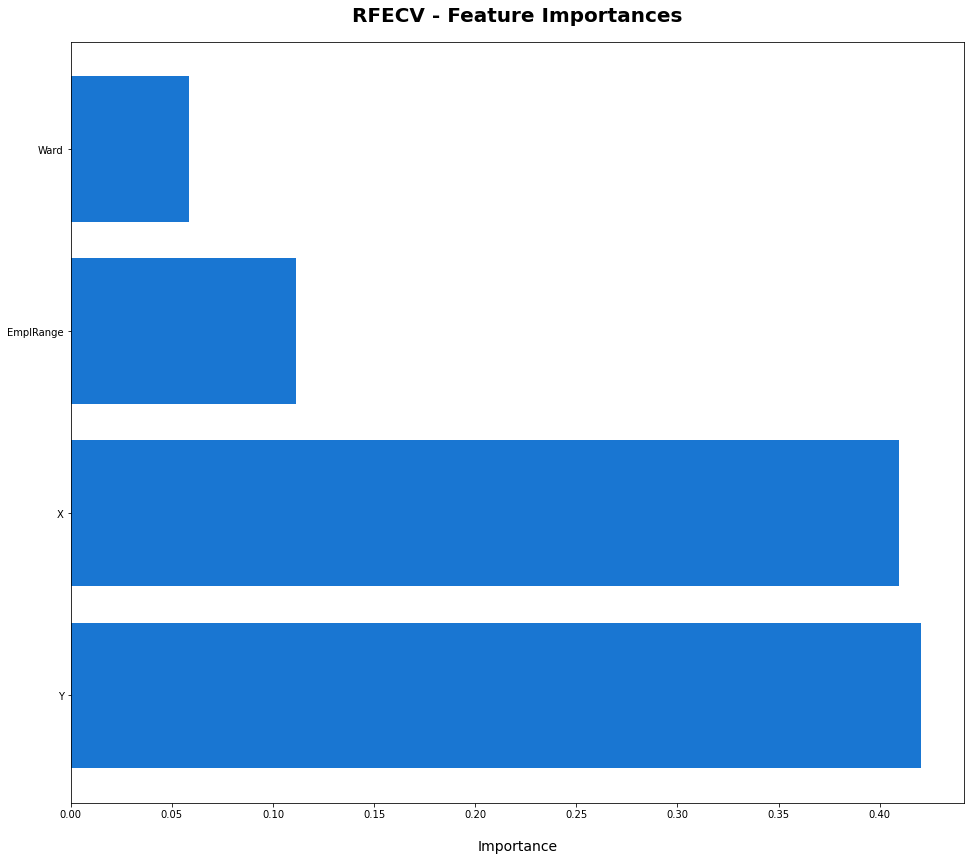

In [333]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
#plt.show()


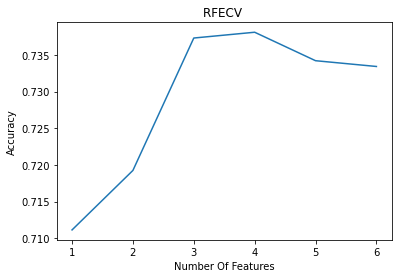

In [334]:
plt.title("RFECV ")
plt.xlabel("Number Of Features")
plt.ylabel("Accuracy")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

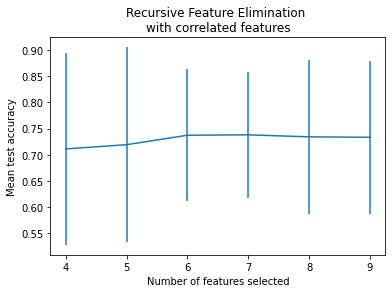

In [335]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [336]:
df_features = pd.DataFrame(columns = ['feature', 'support', 'ranking'])

for i in range(X.shape[1]):
    row = {'feature': i, 'support': rfecv_data.support_[i], 'ranking': rfecv_data.ranking_[i]}
    df_features = df_features.append(row, ignore_index=True)
    
df_features.sort_values(by='ranking').head(10)

,feature,support,ranking
0,0,True,1
1,1,True,1
2,2,True,1
3,3,True,1


In [337]:
df_features[df_features['support']==True]

,feature,support,ranking
0,0,True,1
1,1,True,1
2,2,True,1
3,3,True,1


In [79]:
#Use the selected features as the X values in your models